Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [1]:
NICKNAME =  "Clai101"

---

# Часть 1. Гауссовы квадратуры

Метод Гауссовых квадратур является одним из методов численного интегрирования, который позволяет увеличить точность интегрирования, используя ортогональные полиномы и их корни в качестве узлов.

$$
\int_a^b \!  w(x)\, f(x)\, dx \approx \sum_{k=1}^n w_k \, f(x_k) \;,
$$

здесь $\omega$ - функция весов, которая определят базис ортогональных полиномов, чьи корни используются в качестве узлов интегрирования. 

Получаемая таким образом квадратурная схема *точно* инегрирует $f(x)$ если это полином степени $m\le2n-1$, где $n$ - степень полинома, корни которого используются в качестве узлов.

## Двухточечная квадратура Гаусса

Постройте квадратурную формулу Гаусса, интегрирующую точно многочлены степеней вплоть до третьей на интервале $[a, b]$. Заметим, что для этого достаточно построить _двухточечную_ квадратуру.

    hint:Легко найти точки и веса для отрезка [-1,1], после чего можно сделать аффинное преобразование..

Напишите функцию, которая возвращает веса, $w_1$ и $w_2$, и узлы, $x_1$ и $x_2$, двухточечной квадратурной формулы Гаусса с весовой функцией $w(x) = 1$, т.е., интегралы вида

$$
\int_a^b\! f(x)\, dx \approx w_1 f(x_1) + w_2 f(x_2)
$$

In [5]:
def gauss_2(a, b):
    x1 = (a + b) / 2 - (b - a) * (1 / 3)**0.5 / 2
    x2 = (a + b) / 2 + (b - a) * (1 / 3)**0.5 / 2
    return  x1, x2, (b - a) / 2, (b - a) / 2 

In [6]:
from numpy.testing import assert_allclose

x1, x2, w1, w2 = gauss_2(0, 1)

def f(x, n): 
    return x**n

for n in [0, 1, 2, 3]:
    assert_allclose(w1*f(x1, n=n) + w2*f(x2, n=n),
                    1./(n+1), atol=1e-14)

## Использование ортогональных полиномов

### Legendre

Теперь посчитаем следующий интеграл:

$$
\int_{-1}^1 (7x^3 - 8 x^2 - 3 x + 3) dx  \label{eq1} \tag{1}
$$

Здесь функция уже полиномиальна, поэтому возьмем весовую функцию $\omega(x) = 1$. Тогда вычисление интеграла сводится к сумме корней полинома, соответствующих весовой функции $\omega(x) = 1$. Например, здесь https://dlmf.nist.gov/18.3 вы можете увидеть, какой базис полиномов соответствует вашей весовой функции.

Заметим, что нашей соответствуют полиномы Лежандра. Теперь, зайдем в документацию https://docs.scipy.org/doc/scipy/reference/special.html#orthogonal-polynomials. Функция *roots_legendre* сразу же выдаст корни полиномов Лежандра, а также веса к их корням (для полиномов Лежандра все эти веса равны единице).

1. Посчитайте точное значение интеграла ([1](#mjx-eqn-eq1)) "руками".

In [2]:
F = lambda x: 7/4*x**4 - 8/3*x**3 - 3/2 * x**2 + 3 *x
print(F(1)-F(-1))

0.6666666666666674


2. Посчитайте значение интеграла ([1](#mjx-eqn-eq1)), используя обычный метод интегрирования на равномерной сетке (например, написанный вами в предыдущем дз). Оцените количество узлов, необходимых для достижения относительной точности $10^{-10}$.

In [3]:
import numpy as np
f = lambda x: 7 * x ** 3 - 8 * x ** 2 - 3 * x + 3
def midpoint_rule(f, a, b, eps):
    def i(a, b, n):
            d = (b - a) / n
            return np.sum(np.array([d * f(a + (j + 0.5) * d) for j in range(n)]))

    n = int((b - a) / eps ** 0.5)
    i1 = i(a,b,n)
    while True: 
        i2 = i(a,b,2 * n)
        if abs(i2 - i1) < eps:
            return i2, n * 2 
        i1 = i2 
        n *= 2


value, N = midpoint_rule(f, -1, 1, eps=1e-10)
value, N

(0.6666666666749999, 799996)

3. Посчитайте значение интеграла ([1](#mjx-eqn-eq1)), с помощью Гауссовой квадратуры (используя корни полинома Лежандра степени от 1 до 6 в качестве узлов) (чтобы получить корни и веса используйте scipy.special.roots_legendre)

In [4]:
from scipy.special import roots_legendre
for i in range(6):
    n, w = roots_legendre(i + 1)
    print(f"Степень: {i + 1}, int = {f(n) @ w}")

Степень: 1, int = 6.0
Степень: 2, int = 0.6666666666666674
Степень: 3, int = 0.6666666666666639
Степень: 4, int = 0.6666666666666667
Степень: 5, int = 0.6666666666666685
Степень: 6, int = 0.6666666666666695


Сравните количество узлов, необходимых для достижения одинаковой точности в обоих чисенных методах.

In [5]:
F = lambda x: 7/4*x**4 - 8/3*x**3 - 3/2 * x**2 + 3 *x
f = lambda x: 7 * x ** 3 - 8 * x ** 2 - 3 * x + 3
real_ans = F(1)-F(-1)

def legendre(func, eps):
    n = 0
    i = 0
    while abs(real_ans - i) > real_ans * eps:
            n += 1
            nodes, weights = roots_legendre(n)
            i = func(nodes) @ weights
    return i, n

for i in range(1, 5):
    eps = 10 ** (-i)
    _, n1 = legendre(f, eps)
    _, n2 = midpoint_rule(f, -1, 1, eps)
    
    print(f"Ошибка: {eps}")
    print(f"узлов Гаусса: {n1}, узлов методом центральной точки: {n2}\n")

Ошибка: 0.1
узлов Гаусса: 2, узлов методом центральной точки: 24

Ошибка: 0.01
узлов Гаусса: 2, узлов методом центральной точки: 40

Ошибка: 0.001
узлов Гаусса: 2, узлов методом центральной точки: 252

Ошибка: 0.0001
узлов Гаусса: 2, узлов методом центральной точки: 800




Вычислите значение того же интеграла, но на интервале от 0 до 10.

$$
\int_{0}^{10} (7x^3 - 8 x^2 - 3 x + 3) dx 
$$

Заметим, что больше нельзя использовать полиномы Лежанда, потому что они определены на интервале (-1, 1). Однако всегда можно произвести *аффинное преобразование* для того, чтобы перейти к желаемой системе координат.

(20% итоговой оценки)

In [6]:
n, w = roots_legendre(6)
print(5 * f(5 * n + 5) @ w)

14713.333333333334


Сравните результат с точным значением интеграла.

YOUR ANSWER HERE

### 

Вычислите значение следующиего интеграла:
$$
\int_{0}^{2\pi} \frac{cos(x) dx }{\sqrt{4\pi^2 - x^2}}
$$
используя соответствующий базис ортогональных полиномов.
Найдите степень полинома (количество узлов), при которой точность превысит машинное $\epsilon$.


In [7]:
from scipy.special import roots_chebyt
f = lambda y: np.cos(2 * np.pi *  y) / 2
eps = 1e-16
ans = 1
pans = 0
i = 1
while abs(ans - pans) > eps:
    i += 1
    pans = ans
    n, w = roots_chebyt(i)
    ans = f(n) @ w

print(ans)
print(f"Степень {i}")


0.3460101588122642
Степень 16


# Часть 2. Уравение Фредгольма

Существует два типа уравнений Фредгольма: 

1. Уравение Фредгольма первого рода:
$$
\int_a^b \! K(x, t)\, \color{blue}{f(t)} \,dt = g(x)
$$

2. Уравнение Фредгольма второго рода:
$$
\lambda \int_a^b\! K(x, t)\, \color{blue}{f(t)} \, dt + g(x) = \color{blue}{f(x)}
$$

Здесь функция $f(x)$ неизвестна, $K(x, t)$ - ядро уравнения, заданная функция $g(x)$ и $\lambda$ - рациональное число.
С точки зрения вычислений, уравение Фредгольма первого рода крайне неустойчиво. Далее мы рассмотрим только уравнение второго рода.

Основная идея - аппроксимировать интеграл некой квадратурной формулой

$$
\int_a^b \! \xi(t)\, dt \approx \sum_j^N w_j\, \xi(t_j)
$$

с подходящими весами $w_j$ и узлами $t_j$, $j=1, \dots, N$. Точность аппроксимации контролируется $N$.

Таким образом, уравнение Фредгольма приближается следующим образом:

$$
\lambda \sum_j w_j\, K(x, t_j)\, \color{blue}{f(t_j)} + g(x) = \color{blue}{f(x)}
$$

Отметим, что $x$ - непрерывная переменная, в то время, как $t$ - дискретная.

Рассматривая данное уравнение на тех же узлах сетки $x = t_k$, получаем

$$
\lambda \sum_j w_j \, K_{k, j}\, \color{blue}{f_j} + g_k = \color{blue}{f_k}
$$

где $f_j \equiv f(t_j)$, $g_j \equiv g(t_j)$ and $K_{k, j} \equiv K(t_k, t_j)$. Это ничто иное, как система линейных алгебраических уравнений на вектор $\color{blue}{f_j}$.

Ее решение выдает значение неизвестной функции $f(x)$ в дискретных точках $x=t_j$ для $j=1, \dots, N$.


Решите предложенное уравнение Фредгольма второго рода

$$
f(x) = \cos(x)  + \frac{1}{2\pi} \int_0^\pi \! \sin(x) \,t f(t) \, dt
$$

Здесь $a, b = 0, 1$, $\lambda = \dfrac{1}{2\pi}$, ядро $K(x, t) = \sin(x)\cdot t$ и правая часть - $g(x) = \cos(x)$.

Точное решение (Сборник задач по интегральным уравнениям, 2006):

$$
f(x) = \cos(x)- \frac{2}{\pi}\sin(x)
$$

Для нахождения интеграла преобразуйте заменой переменных в интеграле область интегрирования в [0,1] воспользуйтесь Гауссовой квадратурой с весовой функцией $w(x) = 1$ на $(0, 1)$. Посмотрите на http://dlmf.nist.gov/18.3, и найдите соответствующую функцию в *scipy.special* (обратите внимание на область интегрирования).

Напишите функцию, возвращающую значение f(t_j) по схеме выше, которая в качестве параметра принимает величину $N$--число узлов в квадратуре, для нахождение решения СЛАУ можно использовать `scipy.linalg.solve`.

Постройте график истинного решения и набор (t_j, f_j) для раличных $N$, используя вашу функцию.

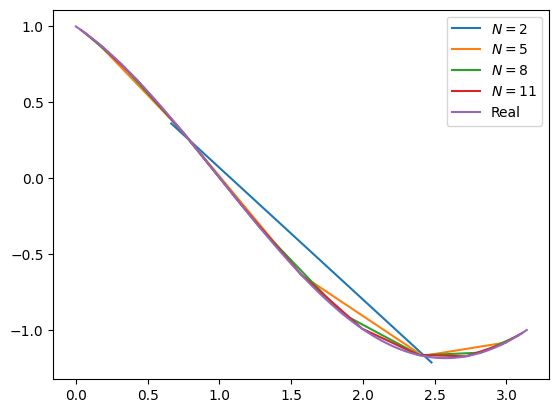

In [49]:
from scipy.special import roots_sh_legendre
from scipy.linalg import solve
import matplotlib.pyplot as plt

def fun(N):
    n, w = roots_sh_legendre(N)
    l = np.pi * 0.5
    K = lambda t_k, t_j: np.sin(np.pi * t_k) * t_j
    g = lambda x: np.cos(np.pi * x)
    I = np.eye(N)
    matrix_K = l * np.asarray([w * K(t_k, n) for t_k in n]) - I
    matrix_minus_g = - g(n)
    f = solve(matrix_K, matrix_minus_g)
    return f

for N in range(2, 12, 3):
    roots, w = roots_sh_legendre(N)
    x = roots * np.pi
    f = fun(N)
    plt.plot(x, f, label=f'$N = {N}$')
real_f = lambda x: np.cos(x) - (2 / np.pi) * np.sin(x)
x = np.linspace(0, np.pi, 100)
plt.plot(x, real_f(x), label='Real')
plt.legend()

Очевидной проблемой предыдущего результата для $f(x)$ является то, что он возвращает решения на фиксированном наборе точек. Мы не контролируем их расположение.

Оказывается, интерполяционные методы (мы обсудим их на следующих занятиях) работают не очень хорошо, в сравнении с следующим подходом:

Используйте изначальный вид, чтобы вычислить значение функции на всём интервале:

$$
f(x) = g(x) + \lambda \sum_j^N w_j\, K(x, t_j)\, f(t_j)
$$

Сравните эту интерполяцию с точным решением для разлиных $N$.
(выбирайте наглядный масштаб)

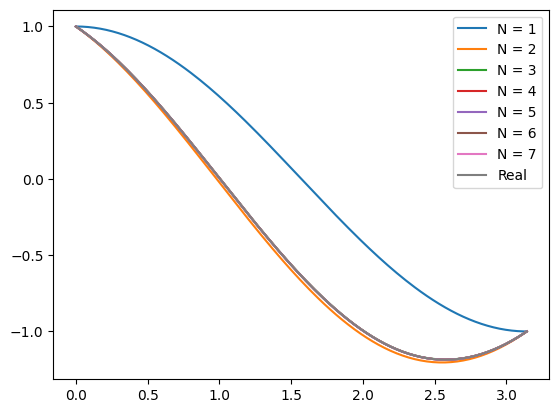

In [58]:
sample = np.linspace(0, np.pi, 150)

for i in range(0, 7, 1):
    n, w = roots_sh_legendre(i + 1)
    f_discret = fun(i + 1)
    f = lambda x: np.cos(x) + np.pi / 2 * (w * np.sin(x, n) * f_discret).sum()
    plt.plot(sample, [f(x) for x in sample], label=f"N = {i + 1}")

plt.plot(sample, real_f(sample), label='Real')
plt.legend()

    

# Часть 3. Интеграл от осциллирующей функции - EXTRA points task

Рассмотрим определенный интеграл

$$
I = \int_0^\infty\! \frac{\sin(x) \cos{(\cos{(x)})}}{x}\,dx
$$

Вычислите значение данного интеграла с относительной точностью $10^{-6}$. Для упрощения задачи можете воспользоваться функционалом `scipy.integrate.quad`.

Заметим, что "из коробки" интеграл вычислить не удается, и нужно что-то придумать.

In [63]:
from math import sin, cos

from scipy.integrate import quad
quad(lambda x: sin(x) * cos(cos(x)) / x, 0, float('inf') )

c:\Users\Xiaomi\source\repos\PytHSEPr\PytHSEPr\HSE_inv\lib\site-packages\ipykernel_launcher.py:4: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  after removing the cwd from sys.path.


0.8400929495808706

Напишите функцию, которая возвращает значение данного интеграла. Только само значение интеграла, без оценки погрешности.
(оборачиваем интеграл в функцию только для удобства автопроверки).

In [130]:
from scipy.integrate import quad
import scipy.special as sp
import numpy as np
from math import sin, cos, exp, tanh
n = 2340
def integ_1():
    return cos(1) - n/2 * quad(lambda x: sin(cos(n*x)) / (n*x)**2, 0,float('inf') )[0]
integ_1()
def integ():
    return 1128329/2949120 * np.pi

c:\Users\Xiaomi\source\repos\PytHSEPr\PytHSEPr\HSE_inv\lib\site-packages\ipykernel_launcher.py:7: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  import sys


Заметим что $cos(x) < 1 < pi/2$  тогда хорошо работает апппроксимациая тейлора, разложив в получим
$$\int_0^\infty \sum \cfrac{\sin(x) \cos(x)^{2n}}{x n!} dx$$
Вспоминаем что:
$$\cos(x) = \sqrt{1 - sin^2(x)} \Rightarrow \cos^{2n}(x) = (1 - sin^2(x))^n = \sum C_n^k (-1)^k\sin(x)^k$$
РАзложив например до 10 степени найдем получим интегралы типа
$$Const \int_0^{\infty} \cfrac{\sin^n(x)}{x} dx$$
А это табличные интегралы.
Достаточно очевидно ($\sin(x)^n$ это функция осцилирующая при росте n вклад уменьшается, еще важно что полюса в 0 нет поэтому каждый интеграл дает конечный вклад), что каждый следующий интеграл даст значение много меньше предыдущего поэтому достаточно взчть 10 первый зазложений.

In [68]:
from numpy.testing import assert_allclose

# this is a test cell, keep it intact
